[*********************100%%**********************]  30 of 30 completed


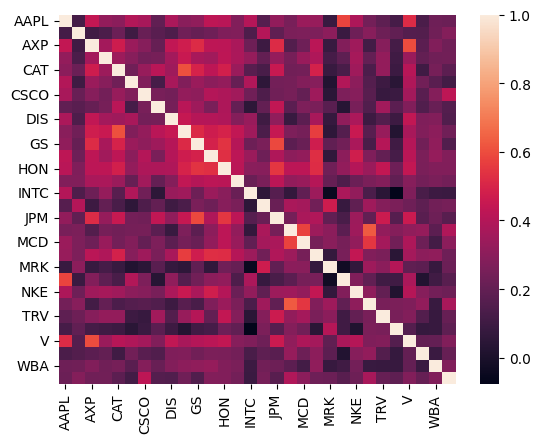

<Figure size 1200x800 with 0 Axes>

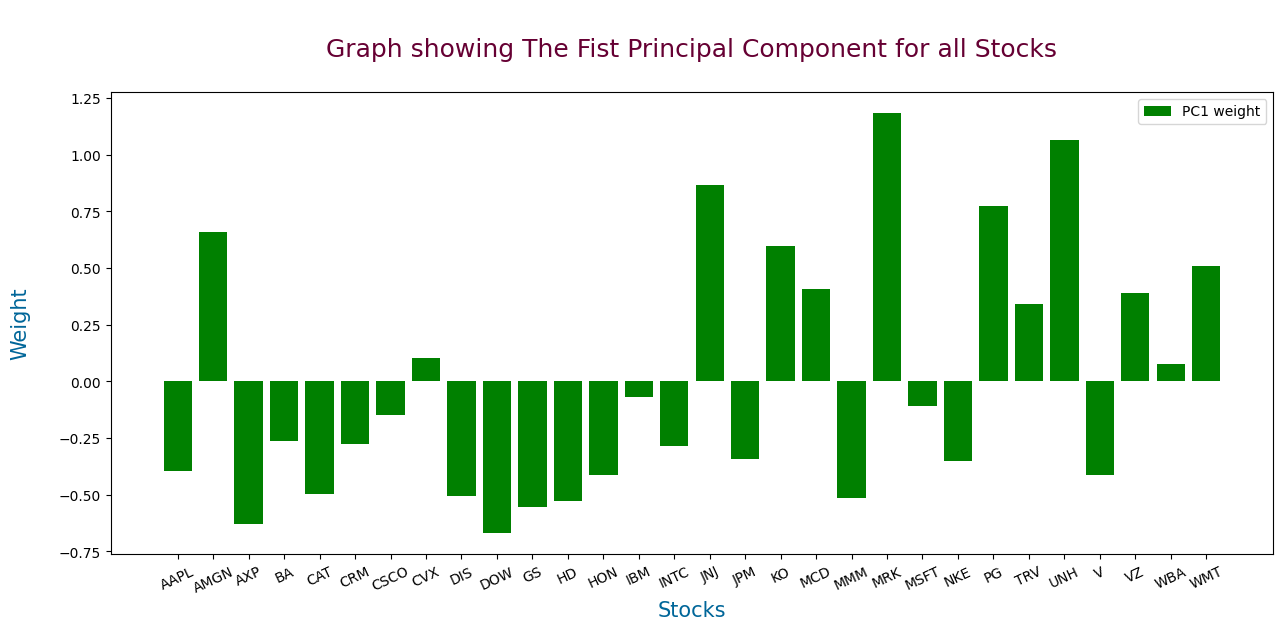

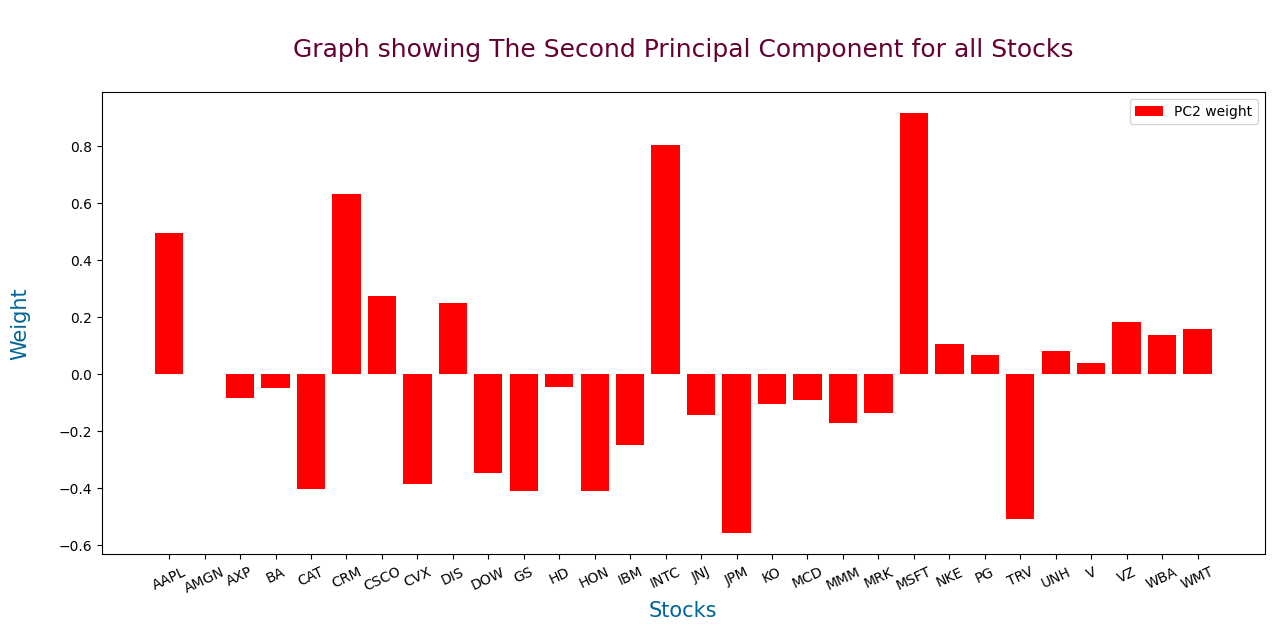

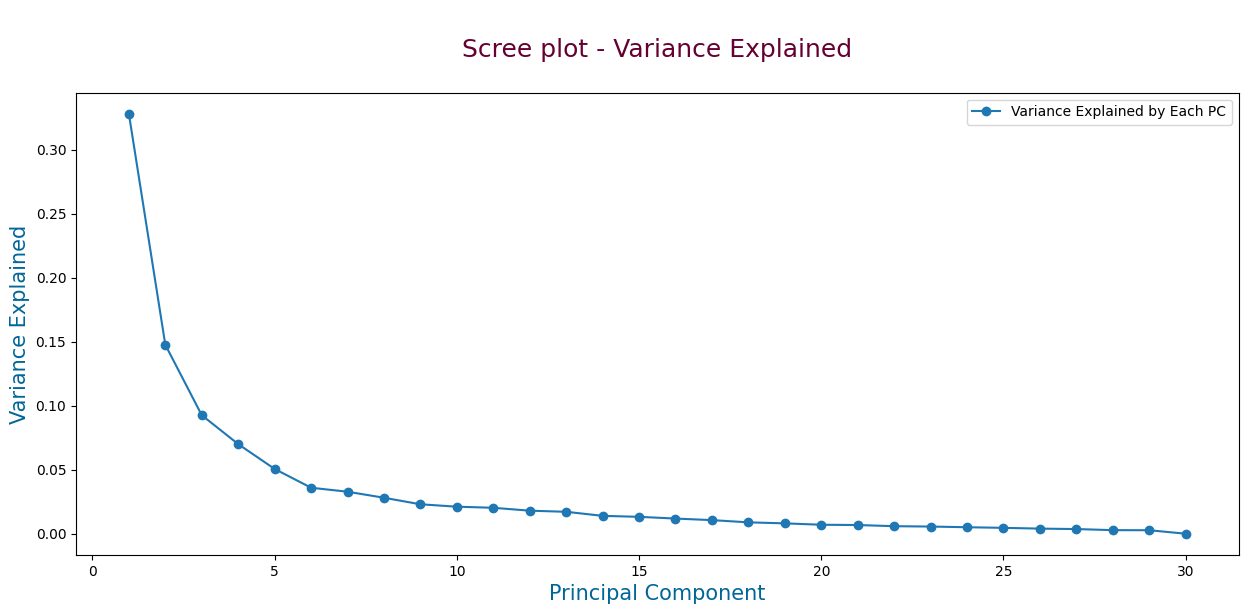

Coverage of 95% variance requires 19 pcs


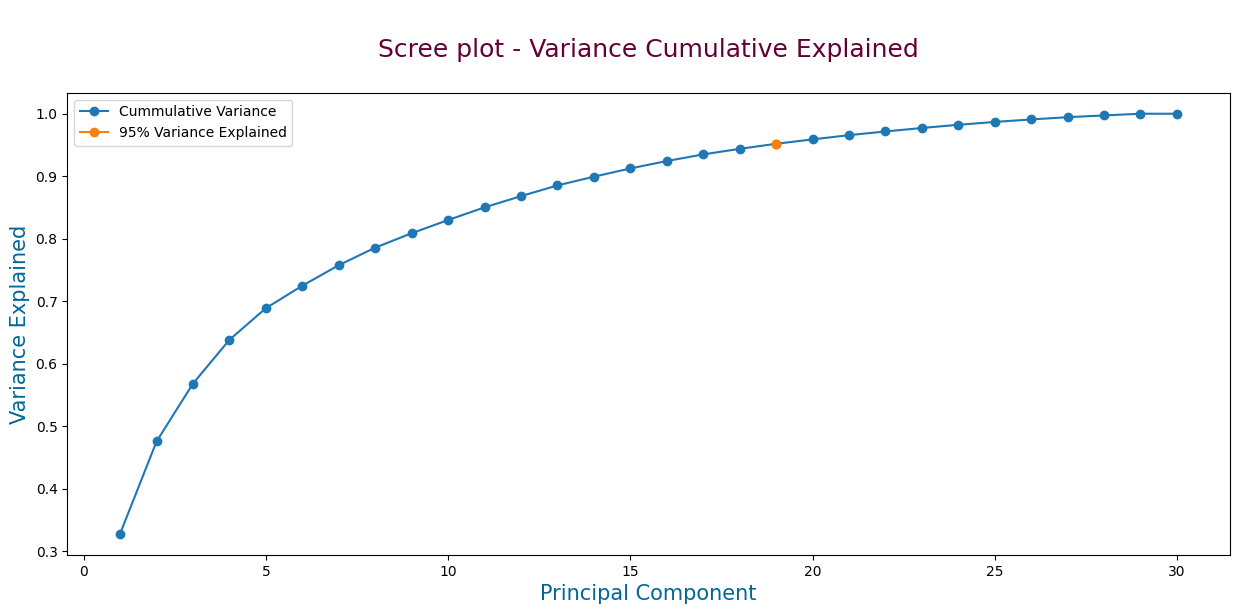

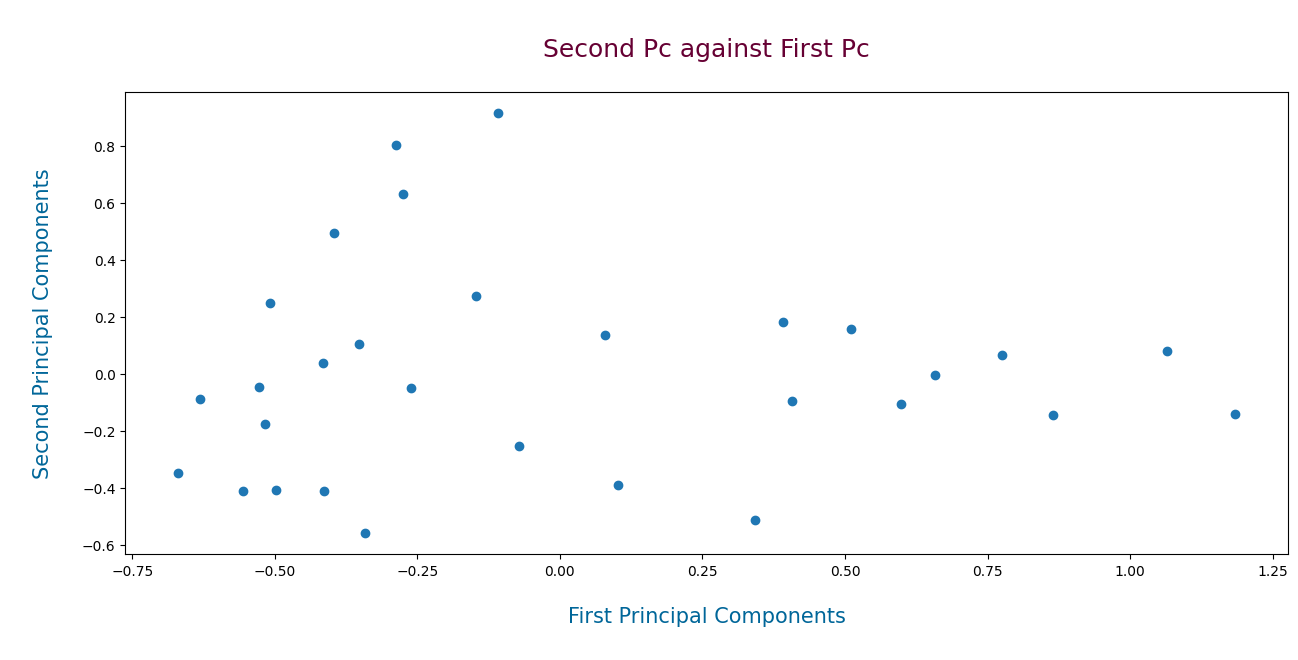


The stocks farthest from PC1 and Euclidean Distance
[('MRK', 1.1839286972744218), ('UNH', 1.0642456322191678), ('JNJ', 0.8646855717343753)]

The most distant stocks in PC1 are ['MRK', 'UNH', 'JNJ']



The stocks farthest from PC2 and Euclidean Distance
[('MSFT', 0.9142011265296706), ('INTC', 0.8024502158441451), ('CRM', 0.6307490983408491)]

The most distant stocks in PC2 are ['MSFT', 'INTC', 'CRM']




In [1]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup

DJI = yf.download(tickers='MMM AXP AMGN AAPL BA CAT CVX CSCO KO DIS DOW GS HD HON IBM INTC JNJ JPM MCD MRK MSFT NKE PG CRM TRV UNH VZ V WBA WMT', period='1y', interval='1d', rounding=True)


# DJI_daily_returns = DJI['Adj Close'].pct_change()[1:]
# # DJI_daily_returns = DJI_daily_returns[1:]
# corMatrix = DJI_daily_returns.corr()
# corMatrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import math

#Compute the daily returns of the stocks

DJI_daily_returns = DJI['Adj Close'].pct_change()[1:]
# X_mean = DJI_daily_returns.mean()
# X_std = DJI_daily_returns.std()
# Z_score = (DJI_daily_returns - X_mean) / X_std

#Find the correlation of the daily returns
C_matrix = DJI_daily_returns.corr()

#Plot the matrix using a heatmap
sns.heatmap(C_matrix)
plt.figure(figsize=(12, 8))
plt.show()

#Create an instance of PCA and fit the matrix to get PCA1 and PCA2
pca = PCA(n_components=2)
pca.fit(C_matrix)
pcs = pca.transform(C_matrix)
# Create the dataframe
pcs_df = pd.DataFrame(pcs, index=C_matrix.index, columns=['PC1', 'PC2'])

#Styling for the titles and labels
titleFont = {'color':'#660033','size':18, 'family':'sans-serif'}
labelsFont = {'color':'#006699','size':15, 'family':'sans-serif'}

#Plot the first PC1's bargraph
stocks = C_matrix.index
cordinate = np.arange(len(stocks))
plt.figure(figsize=(15, 6))
plt.title("\nGraph showing The Fist Principal Component for all Stocks\n", fontdict = titleFont)
plt.xlabel("Stocks", fontdict = labelsFont)
plt.ylabel("Weight\n", fontdict = labelsFont)
plt.bar(cordinate, pcs_df['PC1'], color='green', label='PC1 weight')
plt.xticks(cordinate, stocks, rotation = 25)
plt.legend()
plt.show()

#Plot PC2 's bargraph
plt.figure(figsize=(15, 6))
plt.title("\nGraph showing The Second Principal Component for all Stocks\n", fontdict = titleFont)
plt.xlabel("Stocks", fontdict = labelsFont)
plt.ylabel("Weight\n", fontdict = labelsFont)
plt.bar(cordinate, pcs_df['PC2'], color='red', label='PC2 weight')
plt.xticks(cordinate, stocks, rotation = 25)
plt.legend()
plt.show()

#1.3

""" 
Compare values from PCA to the actual
values of the stocks. Provide comments and explanations on any similarity
observed.

"""
"""
The total variance captured by all the principal components is equal to the total variance in the original dataset.
The first principal component captures the most variation in the data, but 
the second principal component captures the maximum variance that is orthogonal to the first principal component, and so on. 
"""

#1.4

# Create an instance of PCA fit it with the correlation matrix
pca_expr = PCA()
principal_components = pca_expr.fit_transform(C_matrix)

#Store the explained variance ration, and cummulative explained ratio
ex_var = pca_expr.explained_variance_ratio_
cum_ex_var = np.cumsum(ex_var)

#Plot a line graph of explained variance ratio
plt.figure(figsize=(15, 6))
plt.plot(range(1, len(ex_var)+ 1), ex_var, marker='o', label='Variance Explained by Each PC')
plt.title('\nScree plot - Variance Explained\n', fontdict = titleFont)
plt.xlabel('Principal Component', fontdict = labelsFont)
plt.ylabel('Variance Explained', fontdict = labelsFont)
plt.legend()
plt.show()

#Plot a line graph for Cummulative explained variance ratio
plt.figure(figsize=(15, 6))
plt.plot(range(1, len(ex_var)+ 1), cum_ex_var, marker='o', label='Cummulative Variance')
plt.title('\nScree plot - Variance Cumulative Explained\n', fontdict = titleFont)
plt.xlabel('Principal Component', fontdict = labelsFont)
plt.ylabel('Variance Explained', fontdict = labelsFont)

num = 0
var = 0
#Loop through the cummulative variance to determine 95%
for i in cum_ex_var:
    num += 1
    if i >= 0.95:
        var = i
        break

print(f'Coverage of 95% variance requires {num} pcs')
#Plot the 95% threshold
plt.plot(num, var, marker='o', label='95% Variance Explained')
plt.legend()
plt.show()

#1.5
#Scatter plot of PC2 against PC1

plt.figure(figsize=(15, 6))
plt.scatter(pcs[:, 0], pcs[:, 1])
plt.title('\nSecond Pc against First Pc\n', fontdict = titleFont)
plt.xlabel('\nFirst Principal Components\n', fontdict = labelsFont)
plt.ylabel('\nSecond Principal Components\n', fontdict = labelsFont)
plt.show()

mean_pc1_df = pcs_df['PC1'].mean()
mean_pc2_df = pcs_df['PC2'].mean()

def find_euclidean(mean_pc, vector, str):
    distances = []
    
    # for i, row in vector.iterrows(): 
    #      eucl_dist = math.dist([mean_pc1], [row['PC1']])
    #      distances.append((i, eucl_dist))
    #      farthest_stocks = sorted(distances, key= lambda x: x[1], reverse= True)[:3]
    #      dixt_stocks_pc1 = [stock[0] for stock in farthest_stocks]
    # print(farthest_stocks)
    # print(f'The most distant stocks in PC1 are {dixt_stocks_pc1}')

    for i, row in vector.iterrows(): 
         eucl_dist = math.dist([mean_pc], [row[str]])
         distances.append((i, eucl_dist))
         farthest_stocks = sorted(distances, key= lambda x: x[1], reverse= True)[:3]
         dixt_stocks_pc = [stock[0] for stock in farthest_stocks]
    print(f'\nThe stocks farthest from {str} and Euclidean Distance')
    print(farthest_stocks)
    print(f'\nThe most distant stocks in {str} are {dixt_stocks_pc}\n')
    print()
    
find_euclidean(mean_pc1_df, pcs_df, 'PC1')
find_euclidean(mean_pc2_df, pcs_df, 'PC2')

# # Here we are using inbuilt dataset of scikit learn
# from sklearn.datasets import load_breast_cancer
 
# # instantiating
# cancer = load_breast_cancer(as_frame=True)
# c=cancer['target']

# c

Question 2 Assignment 7 DIAML

[*********************100%%**********************]  30 of 30 completed
The pairwise distance between stocks is: 
[1.59575039 0.99857684 1.11127683 1.25081427 0.96035301 1.06141609
 1.4479159  1.00877966 1.26589477 1.22286182 0.98950831 1.12927271
 1.23788973 1.08955499 1.635294   1.25935487 1.45094162 1.26335706
 1.15091617 1.8919442  0.82373759 1.00570644 1.50577181 1.4979866
 1.79905605 0.80270101 1.52337673 1.37437829 1.40474728 1.66128253
 1.43250791 1.49271142 1.5360404  1.33070063 1.31034978 1.54187152
 1.58741188 1.56000088 1.51093469 1.54212806 1.24987105 1.52891251
 0.91504761 1.51610274 1.23056144 1.25674555 1.46539789 1.13939438
 1.57490138 1.41510589 1.16779331 1.25416713 1.27160944 1.57460823
 1.26882461 1.21397436 1.09781666 1.03291362 0.88010666 1.16207252
 1.19297862 1.33496299 0.9005467  0.91271888 0.80300547 0.94670349
 1.03442606 1.07620258 1.38596468 1.74483912 0.86076081 1.62749977
 1.46466884 0.98118648 1.94448448 1.37064934 1.06139195 1.73896249
 1.35179422 1.882

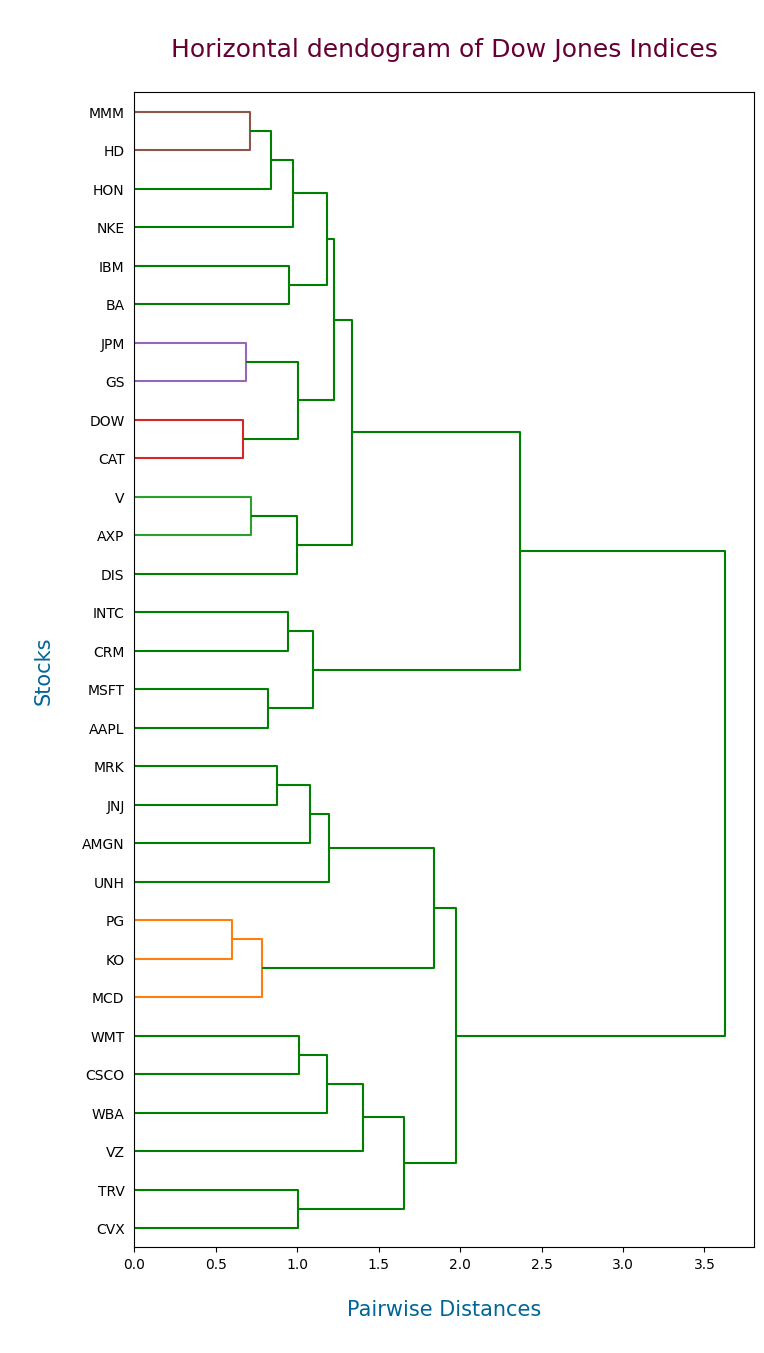

[2 0 1 1 1 2 0 0 1 1 1 1 1 1 2 0 1 0 0 1 0 2 1 0 0 0 1 0 0 0]


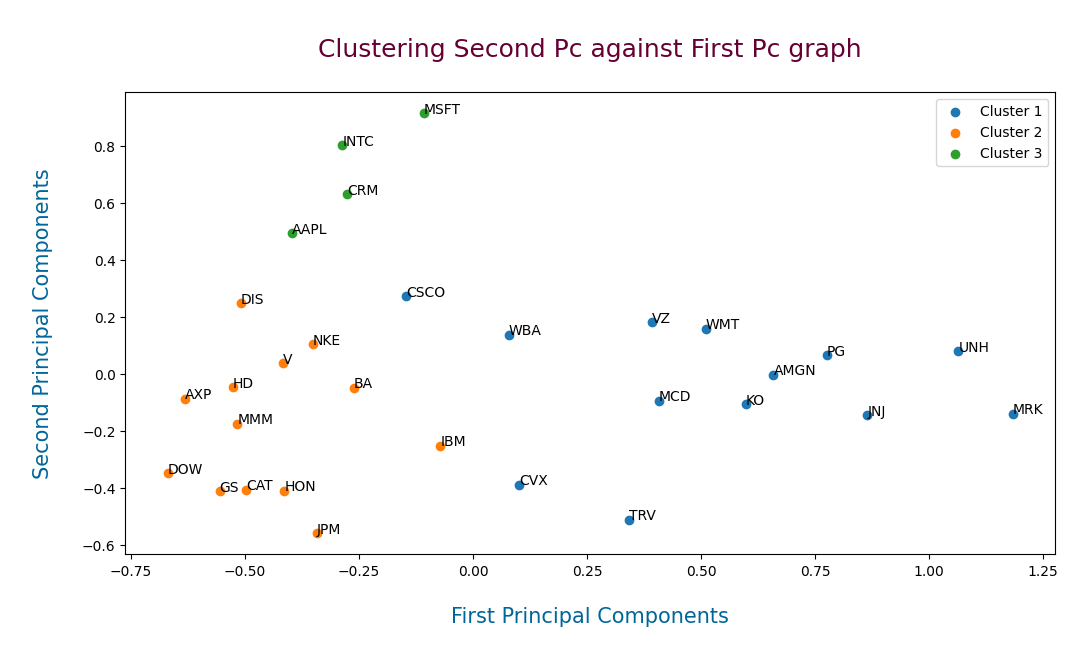

In [3]:
#2.3
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

DJI = yf.download(tickers='MMM AXP AMGN AAPL BA CAT CVX CSCO KO DIS DOW GS HD HON IBM INTC JNJ JPM MCD MRK MSFT NKE PG CRM TRV UNH VZ V WBA WMT', period='1y', interval='1d', rounding=True)


DJI_daily_returns = DJI['Adj Close'].pct_change()[1:]


#Calculate the daily returns matrix
C_matrix = DJI_daily_returns.corr()
#Use pdist to get the pairwise distances
pairwise_dist = pdist(C_matrix, 'euclidean')
# sns.heatmap(C_matrix)
# plt.show()

#Print the pairwise distances
print('The pairwise distance between stocks is: ')
print(pairwise_dist)
""" It's important to note that smaller distances usually indicate greater 
similarity between points, and larger distances indicate greater 
dissimilarity. The exact interpretation will depend on the context of your 
data and the chosen distance metric. """

#Styling for the titles and labels
titleFont = {'color':'#660033','size':18, 'family':'sans-serif'}
labelsFont = {'color':'#006699','size':15, 'family':'sans-serif'}

#2.4
#Constructing a horizontal dendogram using linkage  and plotting with matplotlib
linkage = hierarchy.linkage(C_matrix, method='ward', metric='euclidean')
#Set the figure size
plt.figure(figsize=(8, 15))
#Graph the horizontal dendogram
deod = hierarchy.dendrogram(linkage, labels=C_matrix.index, above_threshold_color='green', color_threshold=.8,
                            orientation='right'
                            )
plt.title('\nHorizontal dendogram of Dow Jones Indices\n', fontdict = titleFont)
plt.xlabel('\nPairwise Distances\n', fontdict = labelsFont)
plt.ylabel('\nStocks\n', fontdict = labelsFont)
plt.show()
#2.5
#Create an instance of AgglomerativeClustering with all necessary parameters
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
#Fit the AgglomerativeClustering with the correlation matrix
labels = hierarchical_cluster.fit_predict(C_matrix) 
#labels of clusters 
print(labels)

#Conduct PCA analysis to get PC1 and PC2
pca = PCA(n_components=2)
pca.fit(C_matrix)
pcs = pca.transform(C_matrix)

# Create the dataframe OF pc1 and PC2
pcs_df = pd.DataFrame(pcs, index=C_matrix.index, columns=['PC1', 'PC2'])

# Plot PC2 against PC1 and highlight the clusters according to labels

plt.figure(figsize=(12, 6))
plt.title('\nClustering Second Pc against First Pc graph\n', fontdict = titleFont)
plt.xlabel('\nFirst Principal Components\n', fontdict = labelsFont)
plt.ylabel('\nSecond Principal Components\n', fontdict = labelsFont)
# plt.scatter(pcs_df['PC1'], pcs_df['PC2'], c=labels)
""" 
This is a loop that iterates over each unique value in the labels array. 
set(labels) creates a set of unique values in the labels array, and the 
loop iterates over these unique cluster labels.
"""

for cluster_label in set(labels):
    """ 
    This line creates a boolean array (cluster_indices) where each element 
    is True if the corresponding element in the labels array is equal to 
    the current cluster_label, and False otherwise.
    """
    cluster_indices = (np.array(labels) == cluster_label)
    """ 
    this line plots the data points of the current cluster on the scatter plot. 
    It uses the cluster_indices boolean array to index the relevant rows in 
    the pcs_df DataFrame, extracting the 'PC1' and 'PC2' values for that 
    cluster. 
    """
    clusterN_pc1 = pcs_df.loc[cluster_indices, 'PC1']
    clusterN_pc2 = pcs_df.loc[cluster_indices, 'PC2']
    
    plt.scatter(clusterN_pc1, clusterN_pc2, label=f'Cluster {cluster_label + 1}')
    # print(f"====Cluster {cluster_label + 1}====")
    # print(clusterN_pc1)
    # print("========")
    # print(clusterN_pc2)


temp_pcs_df = pcs_df
temp_pcs_df['stocks'] = pcs_df.index

for i, record in temp_pcs_df.iterrows():
    plt.annotate(f"{record['stocks']}", xy=(record['PC1'], record['PC2']), xytext=(record['PC1'], record['PC2']), fontsize=10)
#Display labels
plt.legend()
plt.show()


Question 3 Assignment 7

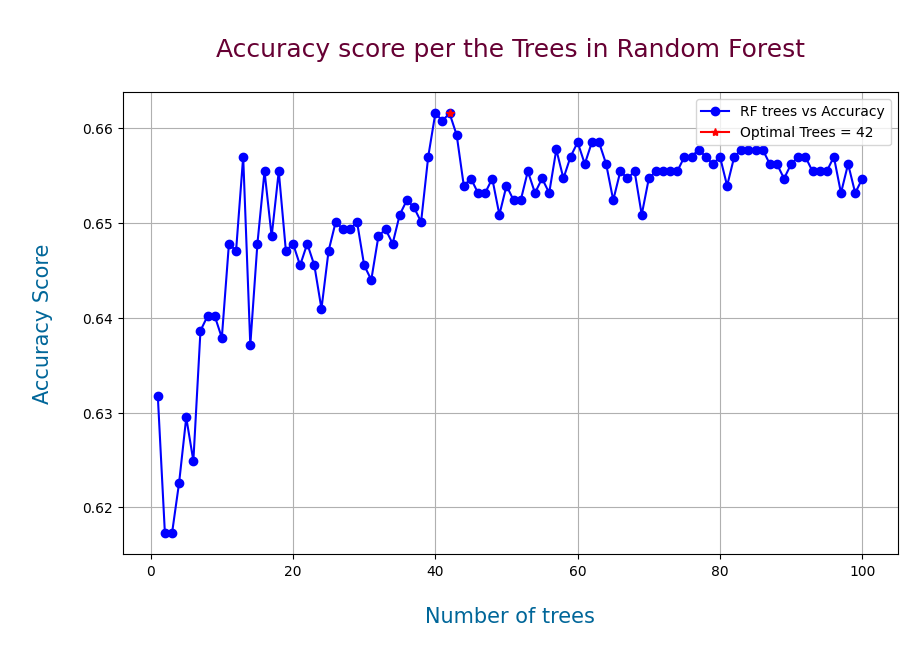

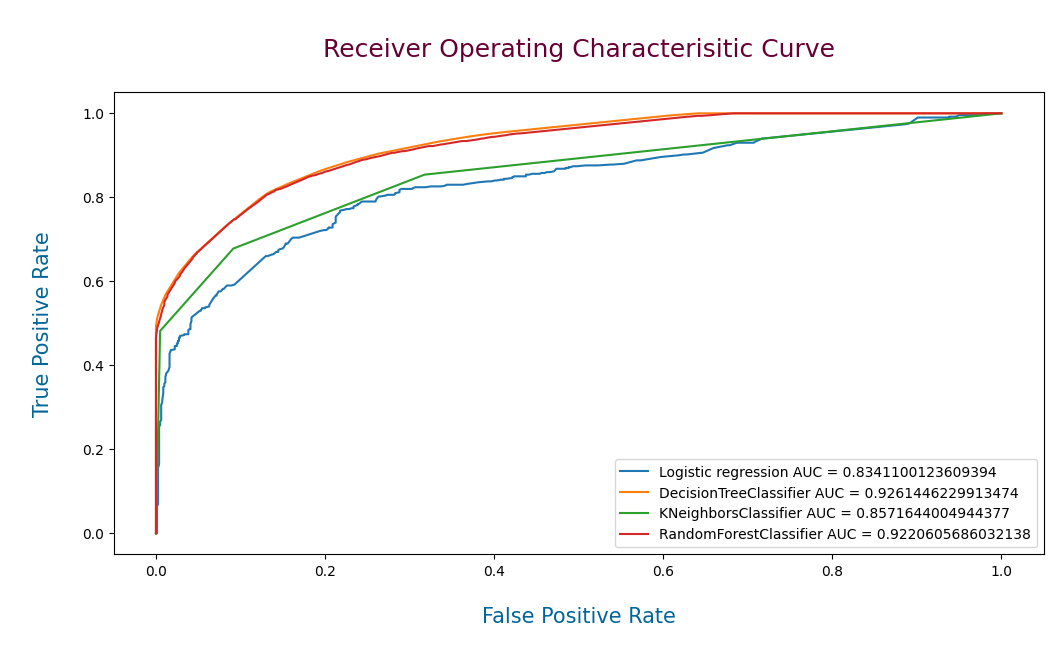

In [1]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import matplotlib.pyplot as plt 
from sklearn import tree
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score

#Load the titanic dataset and clean it
titanic3 = pd.read_csv('titanic3.csv')
key_val = {'male': 0, 'female': 1} 
titanic3['sex'] = titanic3['sex'].map(key_val)
titanic3 = titanic3[['pclass', 'age', 'sex','survived']]
data = titanic3.fillna(titanic3.mean())
X = data[['pclass', 'sex', 'age']]
y = data['survived']

#3.4
# split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#Accuraccy list for different trees
accuraccy_list = []

#This loop uses cross validation to determine the optimal number of trees
#Which is determined by the number of trees used in the model with the highets accuracy
for trees in range(1, 101):
    rfcl = RandomForestClassifier(n_estimators = trees, random_state=42)
    cv_scores = cross_val_score(rfcl, X, y, cv=5, scoring='accuracy')
    
    # rfcl.fit(X_train, y_train)
    # y_pred = rfcl.predict(X_test)
    # acc_score = metrics.accuracy_score(y_test, y_pred)
    accuraccy_list.append(cv_scores.mean())
#Get the optimal tree number
optimal_trees = np.argmax(accuraccy_list) + 1
#Get the accuracy of the optimal model
max_acc_score = max(accuraccy_list)

# print(f'{optimal_trees} === {max_acc_score}')

#Styling for the titles and labels
titleFont = {'color':'#660033','size':18, 'family':'sans-serif'}
labelsFont = {'color':'#006699','size':15, 'family':'sans-serif'}

#Plot the accuracy score of the model against the number of trees
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), accuraccy_list, marker='o', linestyle='-', color='b', label='RF trees vs Accuracy')
plt.plot(optimal_trees, max_acc_score, color='r', marker='*', label=f'Optimal Trees = {optimal_trees}')
plt.title('\nAccuracy score per the Trees in Random Forest\n',  fontdict = titleFont)
plt.xlabel('\nNumber of trees\n', fontdict = labelsFont)
plt.ylabel('\nAccuracy Score\n', fontdict = labelsFont)
plt.grid(True)
plt.legend()
plt.show()


# fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
# for index in range(0, 5):
#     tree.plot_tree(rfcl.estimators_[0],
#                     feature_names = X.columns, 
#                     filled = True,
#                     ax=axes[index])

#3.5

#Undertake a ROC analysis using logistic regression model  

#Logistic regression 
plt.figure(figsize=(12, 6))
plt.title('\nReceiver Operating Characterisitic Curve\n',  fontdict = titleFont)
plt.ylabel('\nTrue Positive Rate\n', fontdict = labelsFont)
plt.xlabel('\nFalse Positive Rate\n', fontdict = labelsFont)
log_reg_model = LogisticRegression()
log_reg_model = log_reg_model.fit(X, y)
# log_reg_yPred = log_reg_model.predict(X_test)

#Undertake the AUC Analysis for logistic regression 
log_reg_yPredProba = log_reg_model.predict_proba(X)[::,1]
log_reg_fpr, log_reg_tpr, _ = metrics.roc_curve(y, log_reg_yPredProba)
log_reg_auc = metrics.roc_auc_score(y, log_reg_yPredProba)
plt.plot(log_reg_fpr, log_reg_tpr, label="Logistic regression AUC = "+str(log_reg_auc))

#Undertake a ROC analysis using DecisionTreeClassifier model  

#DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model = dtc_model.fit(X, y)
# dtc_model_yPred = dtc_model.predict(X_test)

#Undertake the AUC Analysis for DecisionTreeClassifier
dtc_model_yPredProba = dtc_model.predict_proba(X)[::,1]
dtc_model_fpr, dtc_model_tpr, _ = metrics.roc_curve(y, dtc_model_yPredProba)
dtc_model_auc = metrics.roc_auc_score(y, dtc_model_yPredProba)
plt.plot(dtc_model_fpr, dtc_model_tpr, label="DecisionTreeClassifier AUC = "+str(dtc_model_auc))

#Undertake a ROC analysis using KNeighborsClassifier model  
#KNeighborsClassifier
scaler = StandardScaler()
K2n_X_train = scaler.fit_transform(X)
K2n_X_test = scaler.transform(X)
k2n = KNeighborsClassifier(n_neighbors=3)
k2n.fit(K2n_X_train, y)

# k2n_y_pred = k2n.predict(K2n_X_test)

#Undertake the AUC Analysis for KNeighborsClassifier
k2n_yPredProba = k2n.predict_proba(K2n_X_test)[::,1]
k2n_fpr, k2n_tpr, _ = metrics.roc_curve(y, k2n_yPredProba)
k2n_auc = metrics.roc_auc_score(y, k2n_yPredProba)
plt.plot(k2n_fpr, k2n_tpr, label="KNeighborsClassifier AUC = "+str(k2n_auc))

#Undertake a ROC analysis using RandomForestClassifier model 
rfcl = RandomForestClassifier(n_estimators=42, random_state=42)
rfcl = rfcl.fit(X, y)

#Undertake the AUC Analysis for KNeighborsClassifier
rfcl_ypredProba = rfcl.predict_proba(X)[::,1]
rfcl_fpr, rfcl_tpr, _ = metrics.roc_curve(y, rfcl_ypredProba)
rfcl_auc = metrics.roc_auc_score(y, rfcl_ypredProba)
plt.plot(rfcl_fpr, rfcl_tpr, label="RandomForestClassifier AUC = "+str(rfcl_auc))
plt.legend(loc=4)
plt.show()

Question4 Assignment 7

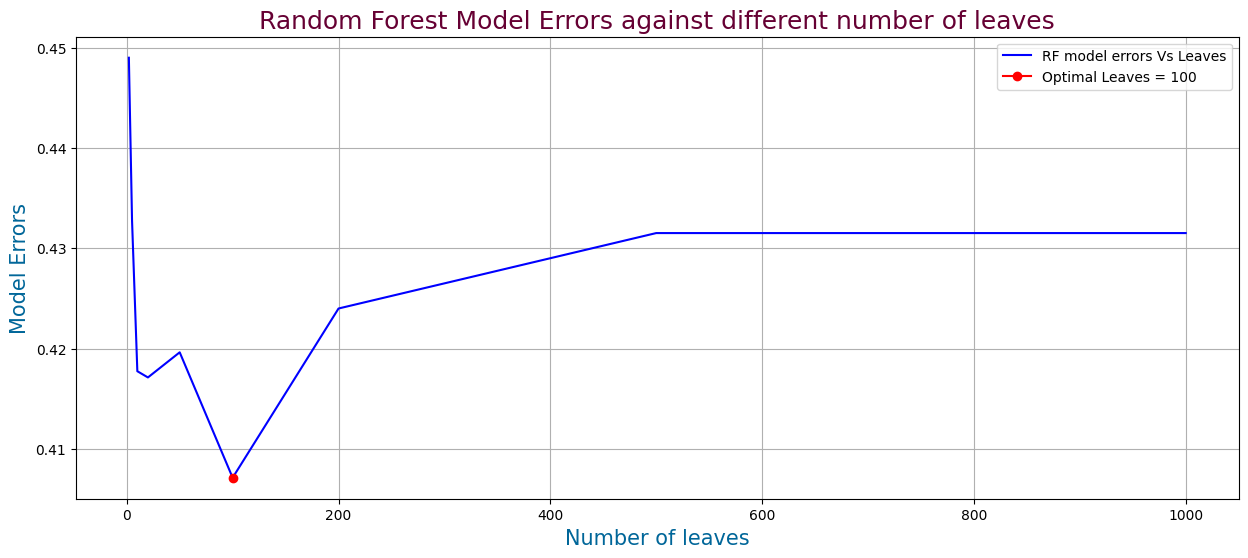

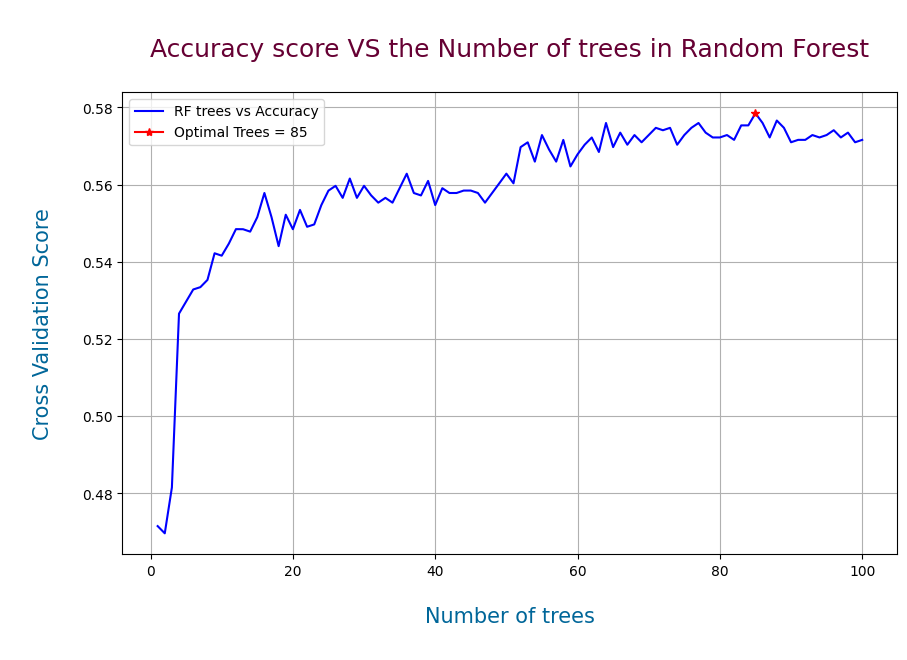

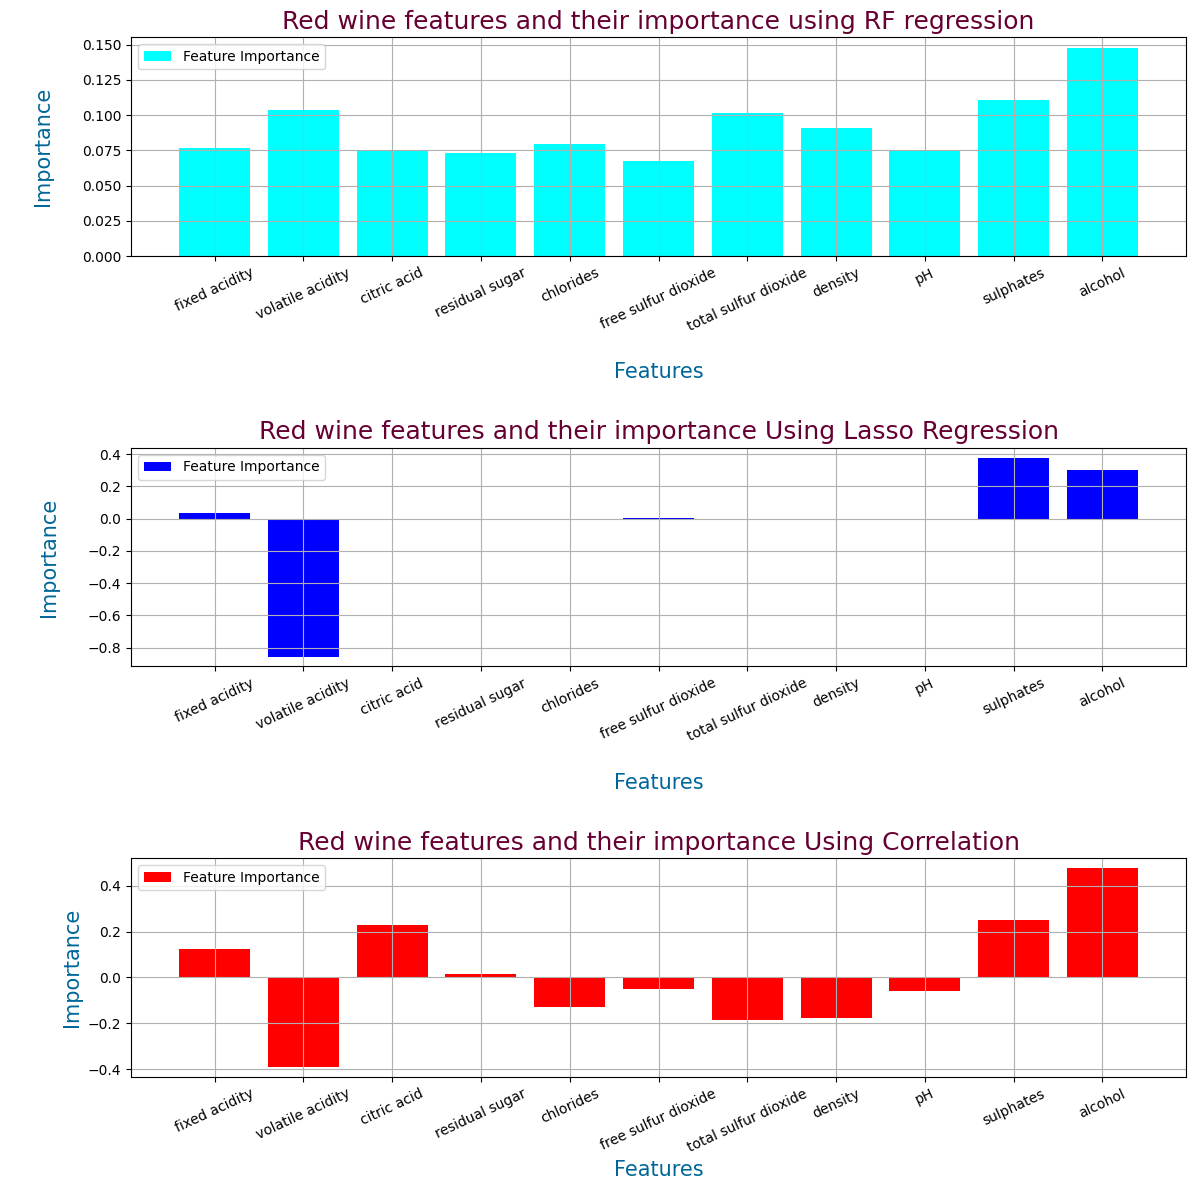

The MSE of the KNeighborsClassifier model is 0.925
The MSE of the Linear regression model is 0.390025143963954
The MSE of the RF model is 0.396875


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
import warnings
import numpy as np
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 

#Loading the and cleaning the red wine dataset
warnings.filterwarnings("ignore", category=UserWarning)
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
X_red_wine = red_wine.iloc[:, :-1]
y_red_wine = red_wine.iloc[:, -1]

#This loop determines the optimal number of leafs required to fit the RF model
#4.2,
leaves = [2, 5, 10, 20, 50, 100, 200, 500, 1000]
errors_list = []

#Styling for the titles and labels
titleFont = {'color':'#660033','size':18, 'family':'sans-serif'}
labelsFont = {'color':'#006699','size':15, 'family':'sans-serif'}

#Determine the number of optimal leaves, using a loop
for leaf in leaves:
    rf_model = RandomForestClassifier(n_estimators=100, max_leaf_nodes=leaf, random_state=42)
    cv_scores = cross_val_score(rf_model, X_red_wine, y_red_wine, cv=5, scoring='accuracy')
    errors_list.append(1 - cv_scores.mean())

optimal_leaves = np.argmin(errors_list) + 1
min_error = np.min(errors_list)

#Plot a line graph of the optimal number of leaves against errors. 
# print(f'{optimal_leaves} === {min_error}')
# print(errors_list)
plt.figure(figsize=(15, 6))
plt.plot(leaves, errors_list, linestyle='-', color='b', label='RF model errors Vs Leaves')
plt.plot(leaves[optimal_leaves-1], min_error, color='r', marker='o',label=f'Optimal Leaves = {leaves[optimal_leaves-1]}')
plt.title('Random Forest Model Errors against different number of leaves', fontdict = titleFont)
plt.xlabel('Number of leaves', fontdict = labelsFont)
plt.ylabel('Model Errors', fontdict = labelsFont)
plt.grid(True)
plt.legend()
plt.show()

#4.3
#Loop to determine the optimal number of trees 
# trees_forest = RandomForestClassifier(warm_start=True, oob_score=True)
# oob_scores = []

# for i in range(1, 101):
#     trees_forest.set_params(n_estimators=i)
#     trees_forest.fit(X_red_wine, y_red_wine)
#     oob_scores.append(trees_forest.oob_score_)

# optimal_trees = np.argmax(oob_scores) + 1
# max_obb_score = max(oob_scores)

# #Graphing the model accuracy against the number of trees
# plt.figure(figsize=(15, 6))
# plt.plot(range(1, 101), oob_scores, linestyle='-', color='b', label='RF trees vs oob_scores')
# plt.plot(optimal_trees, max_obb_score, color='r', marker='o',label=f'Optimal Trees = {optimal_trees}')
# plt.title('OOB score per the Trees in Random Forest')
# plt.xlabel('Number of trees')
# plt.ylabel('OOB Score')
# plt.grid(True)
# plt.legend()
# plt.show()

cross_val_acc = []

for trees in range(1, 101):
    rforest = RandomForestClassifier(n_estimators = trees, random_state=4)
    cv_scores = cross_val_score(rforest, X_red_wine, y_red_wine, cv=5, scoring='accuracy')
    cross_val_acc.append(cv_scores.mean())

#Get the optimal tree number
optimal_trees = np.argmax(cross_val_acc) + 1
#Get the accuracy of the optimal model
max_acc_score = max(cross_val_acc)

# print(f'{optimal_trees} === {max_acc_score}')

#Styling for the titles and labels
titleFont = {'color':'#660033','size':18, 'family':'sans-serif'}
labelsFont = {'color':'#006699','size':15, 'family':'sans-serif'}

#Plot the accuracy score of the model against the number of trees
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), cross_val_acc, linestyle='-', color='b', label='RF trees vs Accuracy')
plt.plot(optimal_trees, max_acc_score, color='r', marker='*', label=f'Optimal Trees = {optimal_trees}')
plt.title('\nAccuracy score VS the Number of trees in Random Forest\n',  fontdict = titleFont)
plt.xlabel('\nNumber of trees\n', fontdict = labelsFont)
plt.ylabel('\nCross Validation Score\n', fontdict = labelsFont)
plt.grid(True)
plt.legend()
plt.show()


# for trees in range(1, 101):
#     rfcl = RandomForestClassifier(n_estimators = trees, random_state=4)
#     cv_scores = cross_val_score(rfcl, X_red_wine, y_red_wine, cv=5, scoring='accuracy')

   
#4.4
#Fitting the model, predicting and Using feature_importances_ to get feature importance
forest = RandomForestClassifier(warm_start=True, oob_score=True, n_estimators=100, random_state=0)
forest.fit(X_red_wine, y_red_wine)
# forest_yPred = forest.predict(X_red_wine)
# forest_mse = mean_squared_error(y_red_wine,forest_yPred)

f_importances = forest.feature_importances_
importances_df = pd.Series(f_importances, index=X_red_wine.columns)
index = np.arange(len(X_red_wine.columns))

# #Bargraph showing the feature importance
# plt.figure(figsize=(15, 6))
# plt.bar(index, f_importances, color='cyan', label='Feature Importance', )
# plt.xticks(index, X_red_wine.columns, rotation = 25)
# plt.title('\nRed wine features and their importance using RF regression\n', fontdict = titleFont)
# plt.xlabel('\nFeatures\n', fontdict = labelsFont)
# plt.ylabel('\nImportance\n', fontdict = labelsFont)
# plt.grid(True)
# plt.legend()
# plt.show()

#Computing the feature importance of Lasso Regression model 
lambda_ = (np.logspace(0.001, 1,100))/100
lasso_cv_model = LassoCV(alphas=lambda_, cv = 10, max_iter=100000).fit(X_red_wine, y_red_wine)
red_lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_red_wine, y_red_wine)
coefficients = pd.Series(red_lasso_tuned.coef_, index = X_red_wine.columns)

# #Bar graph of the lasso model feature importance
# plt.figure(figsize=(15, 6))
# plt.bar(index, red_lasso_tuned.coef_, color='blue', label='Feature Importance')
# plt.xticks(index, X_red_wine.columns, rotation = 25)
# plt.title('Red wine features and their importance Using Lasso Regreesion')
# plt.xlabel('Features')
# plt.ylabel('Importance')
# plt.grid(True)
# plt.legend()
# plt.show()

#Getting the feature importances using correlation 
corr_coefs = red_wine.corr()['quality']
corr_coefs = corr_coefs[corr_coefs.index != 'quality']
corr_coefs

# #Bar graph of feature importance determined by correlation
# plt.figure(figsize=(15, 6))
# plt.bar(index, corr_coefs.values, color='red', label='Feature Importance')
# plt.xticks(index, corr_coefs.index, rotation = 25)
# plt.title('Red wine features and their importance Using Correlation')
# plt.xlabel('Features')
# plt.ylabel('Importance')
# plt.grid(True)
# plt.legend()
# plt.show()

# Set the figure size for all subplots
plt.figure(figsize=(12, 12))

# Bargraph showing the feature importance
plt.subplot(3, 1, 1)
plt.bar(index, f_importances, color='cyan', label='Feature Importance')
plt.xticks(index, X_red_wine.columns, rotation=25)
plt.title('Red wine features and their importance using RF regression', fontdict=titleFont)
plt.xlabel('\nFeatures\n', fontdict=labelsFont)
plt.ylabel('\nImportance\n', fontdict=labelsFont)
plt.grid(True)
plt.legend()

# Bar graph of the lasso model feature importance
plt.subplot(3, 1, 2)
plt.bar(index, red_lasso_tuned.coef_, color='blue', label='Feature Importance')
plt.xticks(index, X_red_wine.columns, rotation=25)
plt.title('Red wine features and their importance Using Lasso Regression', fontdict=titleFont)
plt.xlabel('\nFeatures\n', fontdict=labelsFont)
plt.ylabel('\nImportance\n', fontdict=labelsFont)
plt.grid(True)
plt.legend()

# Bar graph of feature importance determined by correlation
plt.subplot(3, 1, 3)
plt.bar(index, corr_coefs.values, color='red', label='Feature Importance')
plt.xticks(index, corr_coefs.index, rotation=25)
plt.title('Red wine features and their importance Using Correlation', fontdict=titleFont)
plt.xlabel('Features', fontdict=labelsFont)
plt.ylabel('Importance', fontdict=labelsFont)
plt.grid(True)
plt.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


#4.5

#Comparing the accuracy of the KNN model, linear regression model and RF model

red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
X_red_wine = red_wine.iloc[:, :-1]
y_red_wine = red_wine.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_red_wine, y_red_wine, test_size = 0.2, random_state=42)

#Accuracy of the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_yPred = knn.predict(X_test)
knn_mse = mean_squared_error(y_test,knn_yPred)
print("The MSE of the KNeighborsClassifier model is", knn_mse)

#Accuracy of the Linear regression model
lnr = LinearRegression()
lnr.fit(X_train, y_train)
lnr_y_pred = lnr.predict(X_test)
lnr_mse = mean_squared_error(y_test,lnr_y_pred)
print("The MSE of the Linear regression model is", lnr_mse)

###RF model
forest_test = RandomForestClassifier(n_estimators=100, random_state=0)
forest_test.fit(X_train, y_train)
forest_yPred = forest_test.predict(X_test)
forest_mse = mean_squared_error(y_test,forest_yPred)
print("The MSE of the RF model is", forest_mse)


